## Module 4:

## Team Members:
Nolan Nguyen and Trey Hancock

## Project Title:
Modeling Measles Outbreak Dynamics with the SIR Model and Python



## Project Goal:
The goal of this project is to analyze the dynamics of a measles outbreak by fitting and evaluating the SIR epidemiological model using real-world case data from Nigeria, in order to estimate key transmission and recovery parameters and assess how well the model captures the observed spread of the disease.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
* Economic burden
* Risk factors (genetic, lifestyle) & Societal determinants
* Symptoms
* Diagnosis
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

For Nigerian population size as of 2020
* https://data.who.int/countries/566

For infectious period
* https://www.cdc.gov/measles/hcp/communication-resources/clinical-diagnosis-fact-sheet.html

         date  confirmed_cases
0  2020-08-03             25.0
1  2020-08-10             29.0
2  2020-08-17             27.0
3  2020-08-24             20.0
4  2020-08-31             17.0
         date        S_est  I_est  R_est
0  2020-08-03  213999975.0   25.0    0.0
1  2020-08-10  213999946.0   54.0    0.0
2  2020-08-17  213999919.0   81.0    0.0
3  2020-08-24  213999899.0  101.0    0.0
4  2020-08-31  213999882.0  118.0    0.0
5  2020-09-07  213999849.0  151.0    0.0
6  2020-09-14  213999805.0  195.0    0.0
7  2020-09-21  213999771.0  229.0    0.0
8  2020-09-28  213999739.0  236.0   25.0
9  2020-10-05  213999711.0  235.0   54.0
10 2020-10-12  213999687.0  232.0   81.0
11 2020-10-19  213999659.0  240.0  101.0
12 2020-10-26  213999630.0  252.0  118.0
13 2020-11-02  213999601.0  248.0  151.0
14 2020-11-09  213999573.0  232.0  195.0
         date        S_est   I_est    R_est
60 2021-09-27  213990231.0  1364.0   8405.0
61 2021-10-04  213990086.0  1349.0   8565.0
62 2021-10-11  213989930.0

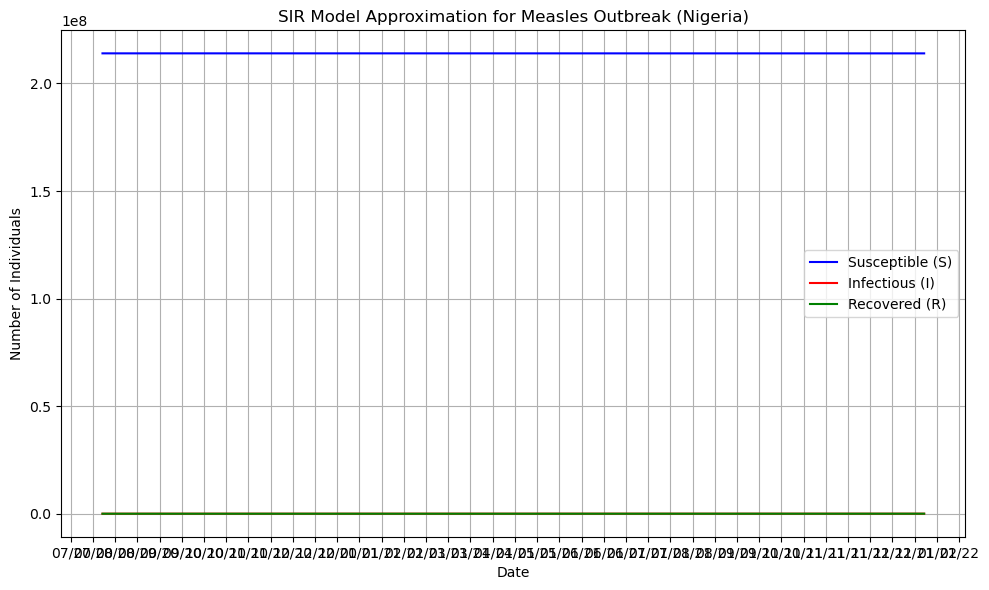

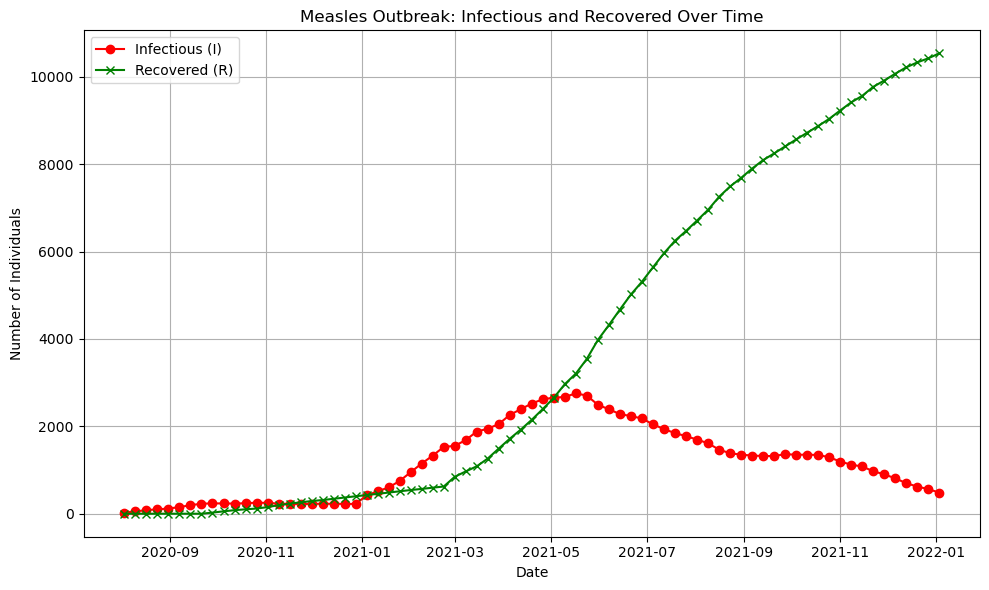

In [19]:
## LOAD YOUR DATASET HERE.

# 1. Read in the csv file of cumulative cases.
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# 3. Plot S, I, R over time.

from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Load the measles epidemiological data (update path as appropriate)
data = pd.read_csv('measles_nigeria_data_2020-2021_new_cases.csv')
print(data.head())

# Make sure date column is a datetime type
data['date'] = pd.to_datetime(data['date'])

# 2. Calculate cumulative confirmed cases (if your data is incidence)
data['cumulative_cases'] = data['confirmed_cases'].cumsum()

# 3. Use convert_cumulative_to_SIR (adjust infectious_period if needed)
population = 214_000_000  # example population, replace with actual as needed
infectious_period = 8     # 4 days before rash and 4 days after
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='cumulative_cases',
    population=population,
    infectious_period=infectious_period,
    new_case_col='confirmed_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].head(15))
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].tail(15))  # to check later points

# Optionally, check if any of the infectious or recovered numbers ever increase:
print(data_sir[['I_est', 'R_est']].describe())  # Look for non-zero ranges
# 4. Plot S, I, R over time (full SIR plot)
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['S_est'], label='Susceptible (S)', color='blue')
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Approximation for Measles Outbreak (Nigeria)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. **Additional plot for visual clarity: Infectious (I) and Recovered (R) only**
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red', marker='o')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green', marker='x')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('Measles Outbreak: Infectious and Recovered Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [20]:
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*